<a href="https://colab.research.google.com/github/MALLIKARJUNABATHALA999/DEEPLEARNING/blob/main/MalariaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow_datasets as tfds

In [129]:
dataset,dataset_info=tfds.load("malaria",with_info=True)

In [130]:
dataset

{'train': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [131]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [132]:
for i in dataset["train"].take(1):
    print(i)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


In [133]:
len(dataset["train"])

27558

In [134]:
dataset,dataset_info=tfds.load("malaria",with_info=True,shuffle_files=True,split=["train[:80%]", "train[80%:90%]", "train[90%:]"])

In [135]:
dataset

[<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>]

In [136]:
train_dataset = dataset[0]
val_dataset=dataset[1]
test_dataset=dataset[2]

In [137]:
def split(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
    DATASET_SIZE=len(dataset)
    train_ds=ds.take(int(TRAIN_RATIO*TOTAL))
    val_ds=ds.take(int(VAL_RATIO*TOTAL))
    test_ds=ds.take(int(TRAIN_RATIO*TOTAL))
    return train_dataset,val_dataset,test_dataset

In [138]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1
train_ds,val_ds,test_ds=split(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(len(train_ds),len(train_dataset))
print(len(val_ds),len(val_dataset))
print(len(test_ds),len(test_dataset))

22046 22046
2756 2756
2756 2756


In [139]:
def get_label_str(label):
    if label==0:
        return "uninfected"
    else:
        return "infected"

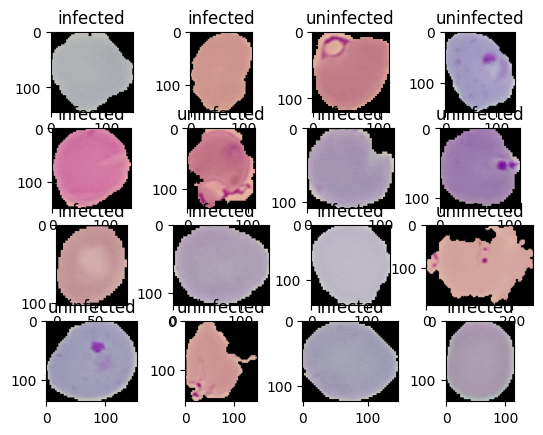

In [144]:
for i,sample in enumerate(train_ds.take(16)):
  ax=plt.subplot(4,4,i+1)
  plt.imshow(sample['image'])
  plt.title(get_label_str(sample['label']))



In [147]:
IM_SIZE=224

In [158]:
def resize_rescale(inputs):
    # Resize the image
    resized_image = tf.image.resize(inputs['image'], (IM_SIZE, IM_SIZE))
    # Rescale the pixel values to be between 0 and 1
    rescaled_image = resized_image / 255.0
    return rescaled_image, inputs['label']


In [160]:
train_dataset=train_ds.map(resize_rescale)

In [161]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
